In [0]:

# Code to read csv file into colaboratory:# Code  
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloaded = drive.CreateFile({'id':'10Xf2Xv_pfnIycH2HpNZR3SwWHiHdrqzX'}) # replace the id with id of file you want to access
downloaded.GetContentFile('handwritten.csv')  

#3. Read file as panda dataframe
import pandas as pd
data = pd.read_csv('handwritten.csv')

In [0]:
!pip install -q keras
!pip install -q numpy
!pip install -q sklearn
!pip install -q matplotlib
!pip install -q pandas

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
%matplotlib inline

from sklearn.model_selection import train_test_split

# Load the Data

In [4]:
# Get the data from the csv file
data = data.values
np.random.shuffle(data)

# Split the data into X, Y, and parition the values into the training and test splits
# Reshape X to be in the shape (N, 28, 28)
X, Y = data[:,1:], data[:,0]
# X = X.reshape(X.shape[0], 28, 28)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

print("Train {} {}".format(X_train.shape, Y_train.shape))
print("Test {} {}".format(X_test.shape, Y_test.shape))

Train (297629, 784) (297629,)
Test (74408, 784) (74408,)


# Data Prep

In [5]:
classes = np.unique(Y_train)
n_classes = len(classes)
print('Total number of outputs : ', n_classes)
print('Output classes : ', classes)

Total number of outputs :  26
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


In [0]:
img_size = 28
img_size_flat = img_size * img_size
img_shape = (img_size, img_size)

classes = np.unique(Y_train)
num_classes = len(classes)

X_train = X_train.reshape(-1, img_size, img_size, 1)
X_test = X_test.reshape(-1, img_size, img_size, 1)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

## Normalization

In [0]:
mean_image = np.mean(X_train, axis=0).astype(np.int64)
X_train = (X_train - mean_image)/255
X_test = (X_test - mean_image)/255

In [8]:
from keras.utils import to_categorical

Y_train_onehot = to_categorical(Y_train)
Y_test_onehot = to_categorical(Y_test)
print("Original Label: {}".format(Y_train[0]))
print("One Hot Label: {}".format(Y_train_onehot[0]))

Original Label: 2
One Hot Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


Using TensorFlow backend.


In [9]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train_onehot, test_size=0.2)

print("Train: {} {}".format(X_train.shape, Y_train.shape))
print("Valid: {} {}".format(X_valid.shape, Y_valid.shape))

Train: (238103, 28, 28, 1) (238103, 26)
Valid: (59526, 28, 28, 1) (59526, 26)


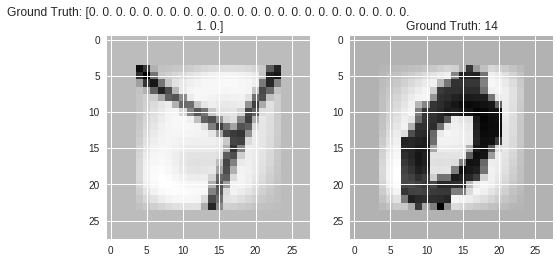

In [10]:
X_example1 = X_train[0]
X_example2 = X_test[0]

fig= plt.figure(figsize=(8,8))

X_example1_2d = X_example1.reshape(28,28)
fig.add_subplot(1,2,1)
plt.imshow(X_example1_2d)
plt.title("Ground Truth: {}".format(Y_train[0]))

X_example2_2d = X_example2.reshape(28,28)
fig.add_subplot(1,2,2)
plt.imshow(X_example2_2d)
plt.title("Ground Truth: {}".format(Y_test[0]))

plt.show()

# Keras Inits

In [0]:
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.layers import LeakyReLU, ELU
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Reshape, MaxPooling2D
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten
from tensorflow.python.keras import initializers
from tensorflow.python.keras.losses import mean_absolute_error


#Add whatever you need here

In [0]:
from tensorflow.python.keras.layers import BatchNormalization
from tensorflow.python.keras.layers import Activation

# Models

In [0]:
batch_size = 128
epochs = 20
num_classes = 26

### [conv-relu-pool]xN -> [affine]xM -> [softmax or SVM]

In [0]:
def model1():
    model = Sequential()
    '''
    initializer: he_normal
    A more recent paper on this topic, Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification by He et al., 
    derives an initialization specifically for ReLU neurons, reaching the conclusion that the variance of neurons 
    in the network should be 2.0/n. This gives the initialization w = np.random.randn(n) * sqrt(2.0/n), 
    and is the current recommendation for use in practice in the specific case of neural networks with ReLU neurons.
    '''
    #convolutional layer
    model.add(Conv2D(kernel_size=7, strides=1, filters=16, padding='same',
                     activation='linear', name='layer_conv1', input_shape=(img_size,img_size,1)))
    #reLU activation
    model.add(LeakyReLU(alpha=0.1))
    #Pooling Layer
    model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))

    model.add(Flatten())
    #Fully-Connected Layer with 128 outputs Adding this in improved scores
    model.add(Dense(128, activation='linear'))
    model.add(LeakyReLU(alpha=0.1))
    #Fully-Connected Layer with Softmax
    model.add(Dense(num_classes, activation='softmax'))

    '''
    For multiclass classification problems like MNIST, cross entropy is typically used as the loss metric
    '''
    model.compile(optimizer=Adam(lr=1e-3),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model
# Insert model here

### [conv-relu-conv-relu-pool]xN -> [affine]xM -> [softmax or SVM]

In [0]:
def model2():
  optimizer = Adam(lr=1e-3)

  model = Sequential()

  #conv
  #keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, 
      #dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
      #bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, 
      #activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
  model.add(Conv2D(filters=16, kernel_size=8, strides = 1, padding='same', activation='linear',
                   bias_initializer='zeros', input_shape=(img_size,img_size,1)))

  #ReLu
  model.add(LeakyReLU(alpha=0.1))

  #conv2
  model.add(Conv2D(filters=16, kernel_size=8, strides = 2, padding='same', activation='linear',
                   bias_initializer='zeros', input_shape=(img_size,img_size,1)))

  #ReLu
  model.add(LeakyReLU(alpha=0.1))

  #MaxPool
  #keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)
  model.add(MaxPooling2D(strides=2, padding='same'))

  #Affine
  model.add(Flatten())

  #keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
      #bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, 
      #activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
  #model.add(Dense(56, activation="relu"))

  model.add(Dense(num_classes, activation='softmax'))

  model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

### [batchnorm-relu-conv]xN -> [affine]xM -> [softmax or SVM]

In [0]:
def model3():
  brc_model = Sequential()

  brc_model.add(BatchNormalization(input_shape=(28, 28, 1)))
  brc_model.add(Activation("relu"))
  brc_model.add(Conv2D(32, kernel_size=(5,5), activation="linear", padding="same"))

  brc_model.add(BatchNormalization())
  brc_model.add(Activation("relu"))
  brc_model.add(Conv2D(64, kernel_size=(5,5), activation="linear", padding="same"))

  brc_model.add(Flatten())

  brc_model.add(Dense(128, activation="relu"))

  brc_model.add(Dense(num_classes, activation='softmax'))
  
  brc_model.compile(optimizer=Adam(lr=1e-3),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
  return brc_model
  

# Training

In [0]:
models = []

In [18]:
mod1 = model1()
mod1.summary()
mod1.fit(x=X_train,
          y=Y_train,
          epochs=epochs, batch_size=128,verbose=1, validation_data=(X_valid, Y_valid))
models.append(mod1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_conv1 (Conv2D)         (None, 28, 28, 16)        800       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               401536    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 26)                3354      
Total para

238103/238103 [==============================] - 26s 111us/step - loss: 0.2144 - acc: 0.9414 - val_loss: 0.0977 - val_acc: 0.9733
Epoch 2/20
202752/238103 [========================>.....] - ETA: 3s - loss: 0.0889 - acc: 0.9761

238103/238103 [==============================] - 23s 95us/step - loss: 0.0876 - acc: 0.9764 - val_loss: 0.0828 - val_acc: 0.9772
Epoch 3/20
238103/238103 [==============================] - 22s 94us/step - loss: 0.0676 - acc: 0.9818 - val_loss: 0.0710 - val_acc: 0.9812
Epoch 4/20
 16640/238103 [=>............................] - ETA: 19s - loss: 0.0483 - acc: 0.9877

238103/238103 [==============================] - 22s 94us/step - loss: 0.0555 - acc: 0.9849 - val_loss: 0.0639 - val_acc: 0.9836
Epoch 5/20
195072/238103 [=======================>......] - ETA: 3s - loss: 0.0472 - acc: 0.9867

238103/238103 [==============================] - 22s 94us/step - loss: 0.0467 - acc: 0.9868 - val_loss: 0.0614 - val_acc: 0.9845
Epoch 6/20
238103/238103 [==============================] - 22s 93us/step - loss: 0.0392 - acc: 0.9890 - val_loss: 0.0592 - val_acc: 0.9846
Epoch 7/20
 15104/238103 [>.............................] - ETA: 20s - loss: 0.0315 - acc: 0.9918

238103/238103 [==============================] - 22s 94us/step - loss: 0.0329 - acc: 0.9908 - val_loss: 0.0581 - val_acc: 0.9852
Epoch 8/20
194048/238103 [=======================>......] - ETA: 3s - loss: 0.0293 - acc: 0.9919

238103/238103 [==============================] - 22s 94us/step - loss: 0.0294 - acc: 0.9919 - val_loss: 0.0564 - val_acc: 0.9862
Epoch 9/20
238103/238103 [==============================] - 23s 95us/step - loss: 0.0262 - acc: 0.9928 - val_loss: 0.0555 - val_acc: 0.9860
Epoch 10/20
 13440/238103 [>.............................] - ETA: 19s - loss: 0.0204 - acc: 0.9952

238103/238103 [==============================] - 22s 94us/step - loss: 0.0231 - acc: 0.9935 - val_loss: 0.0573 - val_acc: 0.9872
Epoch 11/20
194048/238103 [=======================>......] - ETA: 3s - loss: 0.0198 - acc: 0.9947

238103/238103 [==============================] - 23s 95us/step - loss: 0.0207 - acc: 0.9945 - val_loss: 0.0539 - val_acc: 0.9879
Epoch 12/20
238103/238103 [==============================] - 22s 94us/step - loss: 0.0185 - acc: 0.9950 - val_loss: 0.0553 - val_acc: 0.9880
Epoch 13/20
 14208/238103 [>.............................] - ETA: 19s - loss: 0.0161 - acc: 0.9955

238103/238103 [==============================] - 22s 94us/step - loss: 0.0176 - acc: 0.9951 - val_loss: 0.0602 - val_acc: 0.9881
Epoch 14/20
193536/238103 [=======================>......] - ETA: 3s - loss: 0.0169 - acc: 0.9954

238103/238103 [==============================] - 22s 94us/step - loss: 0.0170 - acc: 0.9954 - val_loss: 0.0594 - val_acc: 0.9885
Epoch 15/20
238103/238103 [==============================] - 23s 95us/step - loss: 0.0154 - acc: 0.9962 - val_loss: 0.0592 - val_acc: 0.9885
Epoch 16/20
 13568/238103 [>.............................] - ETA: 20s - loss: 0.0131 - acc: 0.9966

238103/238103 [==============================] - 23s 95us/step - loss: 0.0146 - acc: 0.9961 - val_loss: 0.0561 - val_acc: 0.9892
Epoch 17/20
192896/238103 [=======================>......] - ETA: 3s - loss: 0.0131 - acc: 0.9966

238103/238103 [==============================] - 22s 94us/step - loss: 0.0139 - acc: 0.9964 - val_loss: 0.0630 - val_acc: 0.9884
Epoch 18/20
238103/238103 [==============================] - 23s 95us/step - loss: 0.0134 - acc: 0.9966 - val_loss: 0.0648 - val_acc: 0.9885
Epoch 19/20
 13440/238103 [>.............................] - ETA: 19s - loss: 0.0101 - acc: 0.9974

238103/238103 [==============================] - 22s 93us/step - loss: 0.0135 - acc: 0.9966 - val_loss: 0.0625 - val_acc: 0.9894
Epoch 20/20
194944/238103 [=======================>......] - ETA: 3s - loss: 0.0120 - acc: 0.9972

238103/238103 [==============================] - 22s 93us/step - loss: 0.0127 - acc: 0.9969 - val_loss: 0.0668 - val_acc: 0.9883


In [19]:
mod2 = model2()
mod2.summary()
mod2.fit(x=X_train,
          y=Y_train,
          epochs=epochs, batch_size=128,verbose=1, validation_data=(X_valid, Y_valid))
models.append(mod2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        1040      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        16400     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 26)                20410     
Total para

238103/238103 [==============================] - 30s 125us/step - loss: 0.2451 - acc: 0.9328 - val_loss: 0.1148 - val_acc: 0.9694
Epoch 2/20
146048/238103 [=================>............] - ETA: 10s - loss: 0.1037 - acc: 0.9725

238103/238103 [==============================] - 29s 123us/step - loss: 0.1011 - acc: 0.9733 - val_loss: 0.0930 - val_acc: 0.9752
Epoch 3/20
189056/238103 [======================>.......] - ETA: 5s - loss: 0.0827 - acc: 0.9781

238103/238103 [==============================] - 29s 123us/step - loss: 0.0820 - acc: 0.9782 - val_loss: 0.0784 - val_acc: 0.9791
Epoch 4/20
203264/238103 [========================>.....] - ETA: 4s - loss: 0.0691 - acc: 0.9817

238103/238103 [==============================] - 29s 124us/step - loss: 0.0702 - acc: 0.9815 - val_loss: 0.0708 - val_acc: 0.9816
Epoch 5/20
208768/238103 [=========================>....] - ETA: 3s - loss: 0.0631 - acc: 0.9833

238103/238103 [==============================] - 30s 125us/step - loss: 0.0626 - acc: 0.9834 - val_loss: 0.0724 - val_acc: 0.9813
Epoch 6/20
210688/238103 [=========================>....] - ETA: 3s - loss: 0.0567 - acc: 0.9850

238103/238103 [==============================] - 30s 124us/step - loss: 0.0565 - acc: 0.9850 - val_loss: 0.0670 - val_acc: 0.9827
Epoch 7/20
211968/238103 [=========================>....] - ETA: 3s - loss: 0.0514 - acc: 0.9863

238103/238103 [==============================] - 29s 124us/step - loss: 0.0519 - acc: 0.9861 - val_loss: 0.0652 - val_acc: 0.9834
Epoch 8/20
213760/238103 [=========================>....] - ETA: 2s - loss: 0.0472 - acc: 0.9875

238103/238103 [==============================] - 29s 123us/step - loss: 0.0475 - acc: 0.9874 - val_loss: 0.0666 - val_acc: 0.9825
Epoch 9/20
213248/238103 [=========================>....] - ETA: 2s - loss: 0.0442 - acc: 0.9880

238103/238103 [==============================] - 29s 124us/step - loss: 0.0438 - acc: 0.9881 - val_loss: 0.0649 - val_acc: 0.9839
Epoch 10/20
212096/238103 [=========================>....] - ETA: 2s - loss: 0.0409 - acc: 0.9891

238103/238103 [==============================] - 30s 124us/step - loss: 0.0414 - acc: 0.9888 - val_loss: 0.0639 - val_acc: 0.9835
Epoch 11/20
212096/238103 [=========================>....] - ETA: 2s - loss: 0.0379 - acc: 0.9898

238103/238103 [==============================] - 29s 123us/step - loss: 0.0385 - acc: 0.9896 - val_loss: 0.0613 - val_acc: 0.9848
Epoch 12/20
213248/238103 [=========================>....] - ETA: 2s - loss: 0.0358 - acc: 0.9900

238103/238103 [==============================] - 29s 123us/step - loss: 0.0360 - acc: 0.9900 - val_loss: 0.0618 - val_acc: 0.9852
Epoch 13/20
213504/238103 [=========================>....] - ETA: 2s - loss: 0.0339 - acc: 0.9908

238103/238103 [==============================] - 29s 122us/step - loss: 0.0342 - acc: 0.9907 - val_loss: 0.0601 - val_acc: 0.9856
Epoch 14/20
213248/238103 [=========================>....] - ETA: 2s - loss: 0.0317 - acc: 0.9915

238103/238103 [==============================] - 29s 123us/step - loss: 0.0322 - acc: 0.9912 - val_loss: 0.0622 - val_acc: 0.9849
Epoch 15/20
211456/238103 [=========================>....] - ETA: 3s - loss: 0.0298 - acc: 0.9917

238103/238103 [==============================] - 29s 124us/step - loss: 0.0302 - acc: 0.9917 - val_loss: 0.0595 - val_acc: 0.9865
Epoch 16/20
211456/238103 [=========================>....] - ETA: 3s - loss: 0.0287 - acc: 0.9922

238103/238103 [==============================] - 29s 123us/step - loss: 0.0287 - acc: 0.9921 - val_loss: 0.0600 - val_acc: 0.9867
Epoch 17/20
211456/238103 [=========================>....] - ETA: 3s - loss: 0.0265 - acc: 0.9924

238103/238103 [==============================] - 30s 124us/step - loss: 0.0278 - acc: 0.9922 - val_loss: 0.0626 - val_acc: 0.9866
Epoch 18/20
211584/238103 [=========================>....] - ETA: 3s - loss: 0.0252 - acc: 0.9930

238103/238103 [==============================] - 29s 124us/step - loss: 0.0260 - acc: 0.9929 - val_loss: 0.0654 - val_acc: 0.9862
Epoch 19/20
211200/238103 [=========================>....] - ETA: 3s - loss: 0.0249 - acc: 0.9931

238103/238103 [==============================] - 30s 124us/step - loss: 0.0252 - acc: 0.9931 - val_loss: 0.0594 - val_acc: 0.9878
Epoch 20/20
211712/238103 [=========================>....] - ETA: 3s - loss: 0.0242 - acc: 0.9934

238103/238103 [==============================] - 30s 124us/step - loss: 0.0245 - acc: 0.9933 - val_loss: 0.0650 - val_acc: 0.9860


In [20]:
mod3 = model3()
mod3.summary()
mod3.fit(x=X_train,
          y=Y_train,
          epochs=epochs, batch_size=128,verbose=1, validation_data=(X_valid, Y_valid))
models.append(mod3)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        51264     
_________________________________________________________________
flatten_3 (Flatten)          (None, 50176)             0         
__________

238103/238103 [==============================] - 67s 282us/step - loss: 0.2360 - acc: 0.9404 - val_loss: 0.1313 - val_acc: 0.9673
Epoch 2/20
 19584/238103 [=>............................] - ETA: 56s - loss: 0.1022 - acc: 0.9727

238103/238103 [==============================] - 67s 280us/step - loss: 0.0994 - acc: 0.9731 - val_loss: 0.0849 - val_acc: 0.9778
Epoch 3/20
 22400/238103 [=>............................] - ETA: 56s - loss: 0.0639 - acc: 0.9820

238103/238103 [==============================] - 67s 280us/step - loss: 0.0739 - acc: 0.9795 - val_loss: 0.0845 - val_acc: 0.9775
Epoch 4/20
 23936/238103 [==>...........................] - ETA: 55s - loss: 0.0491 - acc: 0.9862

238103/238103 [==============================] - 66s 279us/step - loss: 0.0603 - acc: 0.9830 - val_loss: 0.0752 - val_acc: 0.9804
Epoch 5/20
 23424/238103 [=>............................] - ETA: 55s - loss: 0.0401 - acc: 0.9883

238103/238103 [==============================] - 66s 277us/step - loss: 0.0488 - acc: 0.9861 - val_loss: 0.0812 - val_acc: 0.9797
Epoch 6/20
 24704/238103 [==>...........................] - ETA: 55s - loss: 0.0332 - acc: 0.9901

238103/238103 [==============================] - 66s 277us/step - loss: 0.0411 - acc: 0.9881 - val_loss: 0.0725 - val_acc: 0.9824
Epoch 7/20
 24448/238103 [==>...........................] - ETA: 55s - loss: 0.0295 - acc: 0.9908

238103/238103 [==============================] - 66s 278us/step - loss: 0.0342 - acc: 0.9905 - val_loss: 0.0742 - val_acc: 0.9836
Epoch 8/20
 24960/238103 [==>...........................] - ETA: 54s - loss: 0.0188 - acc: 0.9944

238103/238103 [==============================] - 66s 278us/step - loss: 0.0298 - acc: 0.9917 - val_loss: 0.0745 - val_acc: 0.9844
Epoch 9/20
 21120/238103 [=>............................] - ETA: 56s - loss: 0.0256 - acc: 0.9936

238103/238103 [==============================] - 66s 278us/step - loss: 0.0275 - acc: 0.9925 - val_loss: 0.0887 - val_acc: 0.9833
Epoch 10/20
 22400/238103 [=>............................] - ETA: 55s - loss: 0.0285 - acc: 0.9928

238103/238103 [==============================] - 66s 278us/step - loss: 0.0243 - acc: 0.9935 - val_loss: 0.0826 - val_acc: 0.9844
Epoch 11/20
 18816/238103 [=>............................] - ETA: 57s - loss: 0.0193 - acc: 0.9945

238103/238103 [==============================] - 66s 277us/step - loss: 0.0221 - acc: 0.9944 - val_loss: 0.0898 - val_acc: 0.9858
Epoch 12/20
 22656/238103 [=>............................] - ETA: 55s - loss: 0.0275 - acc: 0.9936

238103/238103 [==============================] - 66s 277us/step - loss: 0.0228 - acc: 0.9944 - val_loss: 0.0787 - val_acc: 0.9875
Epoch 13/20
 24704/238103 [==>...........................] - ETA: 55s - loss: 0.0180 - acc: 0.9960

238103/238103 [==============================] - 66s 278us/step - loss: 0.0210 - acc: 0.9948 - val_loss: 0.0850 - val_acc: 0.9868
Epoch 14/20
 21888/238103 [=>............................] - ETA: 56s - loss: 0.0142 - acc: 0.9967

238103/238103 [==============================] - 66s 278us/step - loss: 0.0208 - acc: 0.9952 - val_loss: 0.0793 - val_acc: 0.9884
Epoch 15/20
 23168/238103 [=>............................] - ETA: 55s - loss: 0.0132 - acc: 0.9974

238103/238103 [==============================] - 66s 277us/step - loss: 0.0188 - acc: 0.9957 - val_loss: 0.0816 - val_acc: 0.9873
Epoch 16/20
 22912/238103 [=>............................] - ETA: 55s - loss: 0.0100 - acc: 0.9976

238103/238103 [==============================] - 66s 277us/step - loss: 0.0187 - acc: 0.9958 - val_loss: 0.0937 - val_acc: 0.9858
Epoch 17/20
 22400/238103 [=>............................] - ETA: 56s - loss: 0.0175 - acc: 0.9958

238103/238103 [==============================] - 66s 278us/step - loss: 0.0187 - acc: 0.9959 - val_loss: 0.1029 - val_acc: 0.9850
Epoch 18/20
 22656/238103 [=>............................] - ETA: 56s - loss: 0.0226 - acc: 0.9955

238103/238103 [==============================] - 66s 279us/step - loss: 0.0174 - acc: 0.9964 - val_loss: 0.1062 - val_acc: 0.9852
Epoch 19/20
 22144/238103 [=>............................] - ETA: 56s - loss: 0.0141 - acc: 0.9972

238103/238103 [==============================] - 67s 280us/step - loss: 0.0190 - acc: 0.9961 - val_loss: 0.0895 - val_acc: 0.9881
Epoch 20/20
 20352/238103 [=>............................] - ETA: 56s - loss: 0.0192 - acc: 0.9966

238103/238103 [==============================] - 67s 279us/step - loss: 0.0171 - acc: 0.9964 - val_loss: 0.1070 - val_acc: 0.9863


# Ensemble

In [21]:
preds = tf.argmax(np.mean([mod.predict(X_test) for mod in models], axis=0),1)
Y_pred = tf.Session().run(preds)
incorrect = 0
for i in range(len(Y_pred)):
  if Y_pred[i] != Y_test[i]:
    incorrect += 1
print("Accuracy:", 1.0 * (len(Y_pred)-incorrect) / len(Y_pred) )

Accuracy: 0.991801956778841
